Loan Default Analysis:

This analysis is to answer the question "how to manage the portfolio within the risk appetite by balancing the risk and reward?"

Here are the steps to complete the task: 

1. understand the raw data
2. perform analysis to determine the default rate within each segment 
3. conduct risk-reward analysis 
4. provid insights from the analysis result
5. make recommendation with impact analysis




In [1]:
#import library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#import dataset

file = r'E:\Study\Project\Loan Default Analysis/Loan_default.csv/Loan_default.csv'

df = pd.read_csv(file)



STEP 1: understand the raw data

    

In [2]:
#remove duplicate records

df.drop_duplicates()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [3]:
# check the shape and data structure
df.shape

(255347, 18)

In [4]:
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
#check the data values in decriptive data fields

cat_var = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner' ]

for x in cat_var:
    print(df[x].value_counts())

Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: Education, dtype: int64
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: EmploymentType, dtype: int64
Married     85302
Divorced    85033
Single      85012
Name: MaritalStatus, dtype: int64
Yes    127677
No     127670
Name: HasMortgage, dtype: int64
Yes    127742
No     127605
Name: HasDependents, dtype: int64
Business     51298
Home         51286
Education    51005
Other        50914
Auto         50844
Name: LoanPurpose, dtype: int64
Yes    127701
No     127646
Name: HasCoSigner, dtype: int64


In [7]:
#check any null values in numeric data fields

num_var = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']

for x in num_var:
    print(x)
    print(df[x].isnull().sum())


Age
0
Income
0
LoanAmount
0
CreditScore
0
MonthsEmployed
0
NumCreditLines
0
InterestRate
0
LoanTerm
0
DTIRatio
0


In [8]:
# understand the default rate, the average default rate and the number of default

df['Default'].describe()


count    255347.000000
mean          0.116128
std           0.320379
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Default, dtype: float64

In [9]:
df['Default'].value_counts()

0    225694
1     29653
Name: Default, dtype: int64



STEP 2: perform analysis to determine the default rate within each segment 



In [10]:
#check the dafault rate of all categorical data variable

for x in cat_var:
    print(df.groupby(x)['Default'].describe())

               count      mean       std  min  25%  50%  75%  max
Education                                                        
Bachelor's   64366.0  0.121011  0.326143  0.0  0.0  0.0  0.0  1.0
High School  63903.0  0.128789  0.334969  0.0  0.0  0.0  0.0  1.0
Master's     63541.0  0.108717  0.311287  0.0  0.0  0.0  0.0  1.0
PhD          63537.0  0.105860  0.307660  0.0  0.0  0.0  0.0  1.0
                  count      mean       std  min  25%  50%  75%  max
EmploymentType                                                      
Full-time       63656.0  0.094634  0.292711  0.0  0.0  0.0  0.0  1.0
Part-time       64161.0  0.119652  0.324557  0.0  0.0  0.0  0.0  1.0
Self-employed   63706.0  0.114620  0.318566  0.0  0.0  0.0  0.0  1.0
Unemployed      63824.0  0.135529  0.342290  0.0  0.0  0.0  0.0  1.0
                 count      mean       std  min  25%  50%  75%  max
MaritalStatus                                                      
Divorced       85033.0  0.125328  0.331092  0.0  0.0  

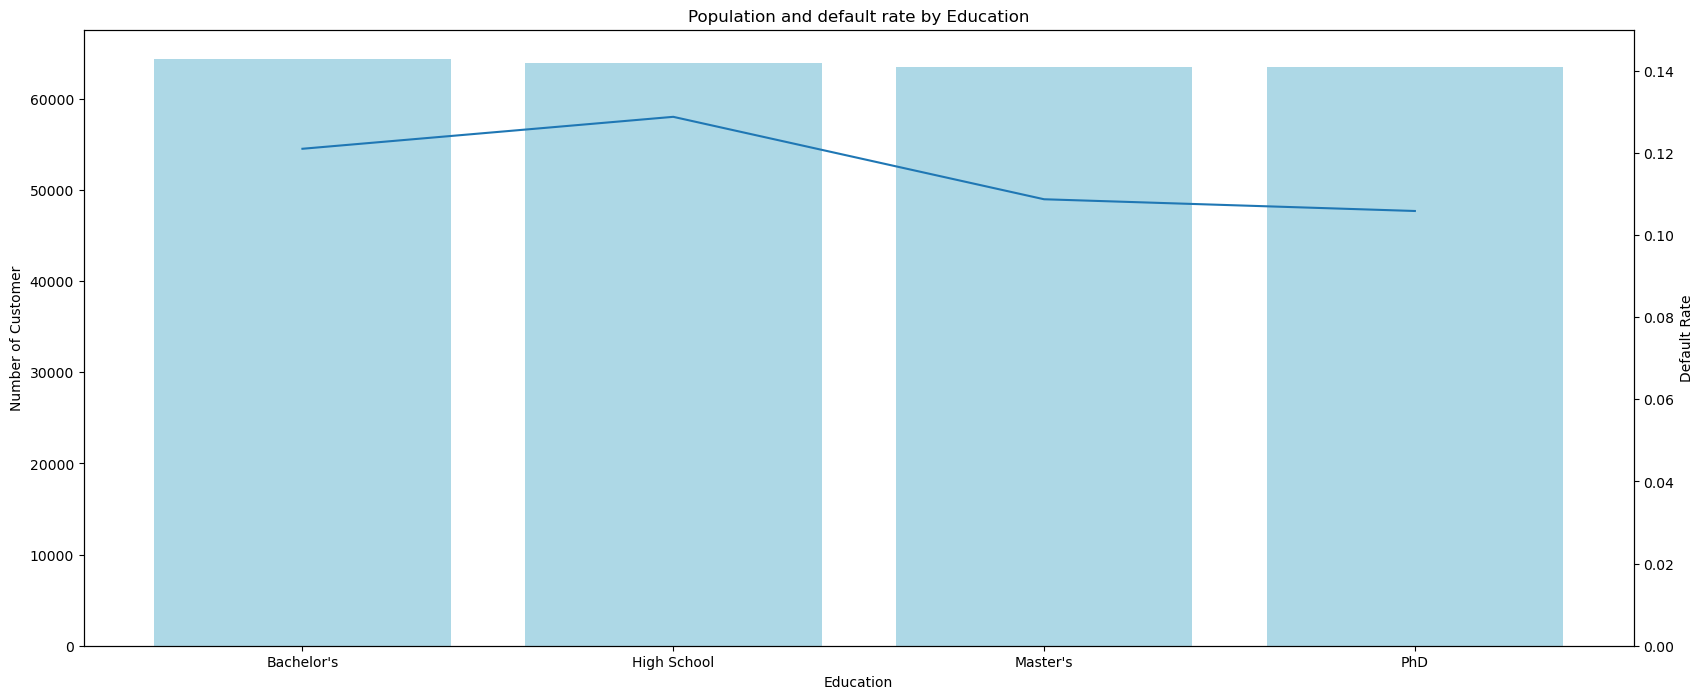

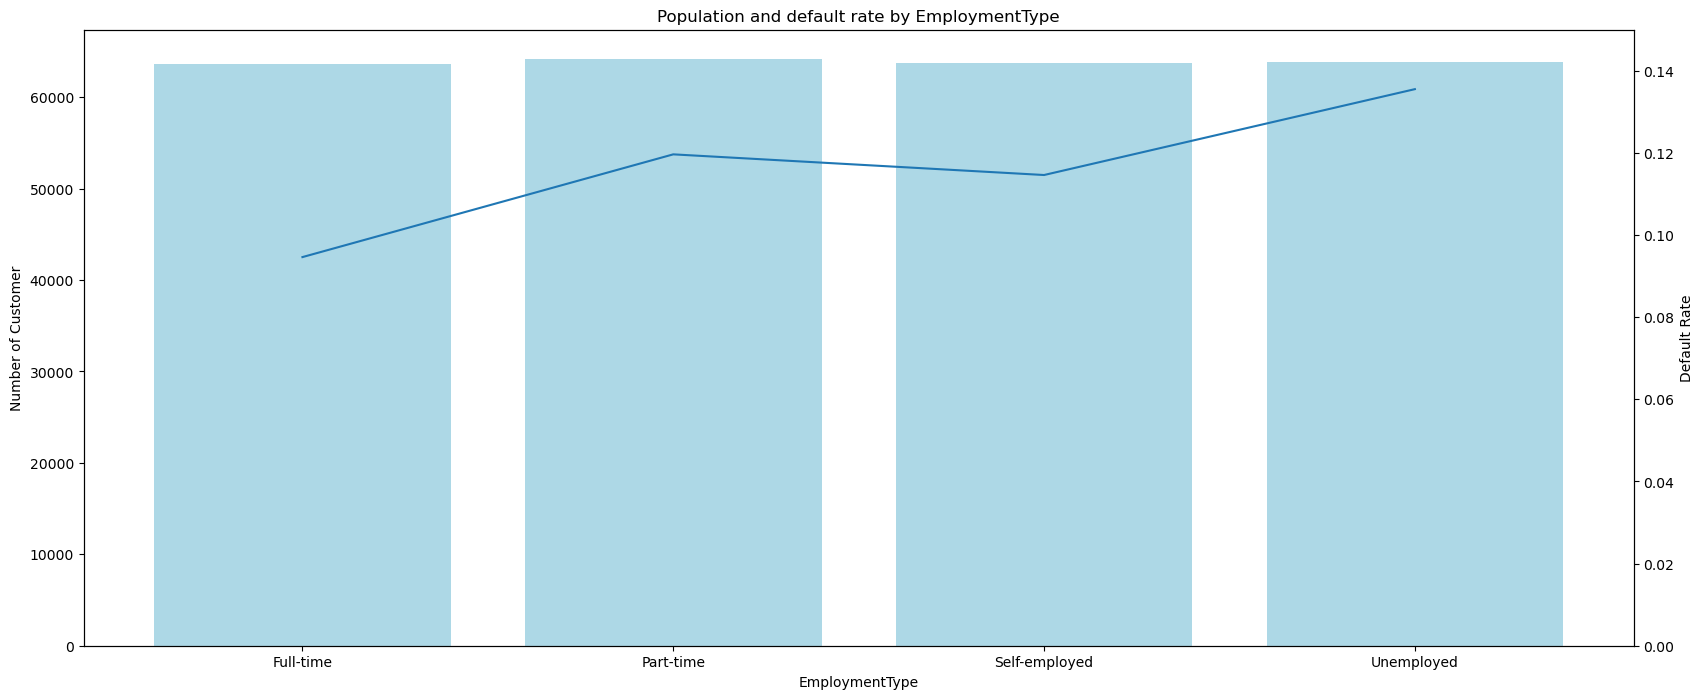

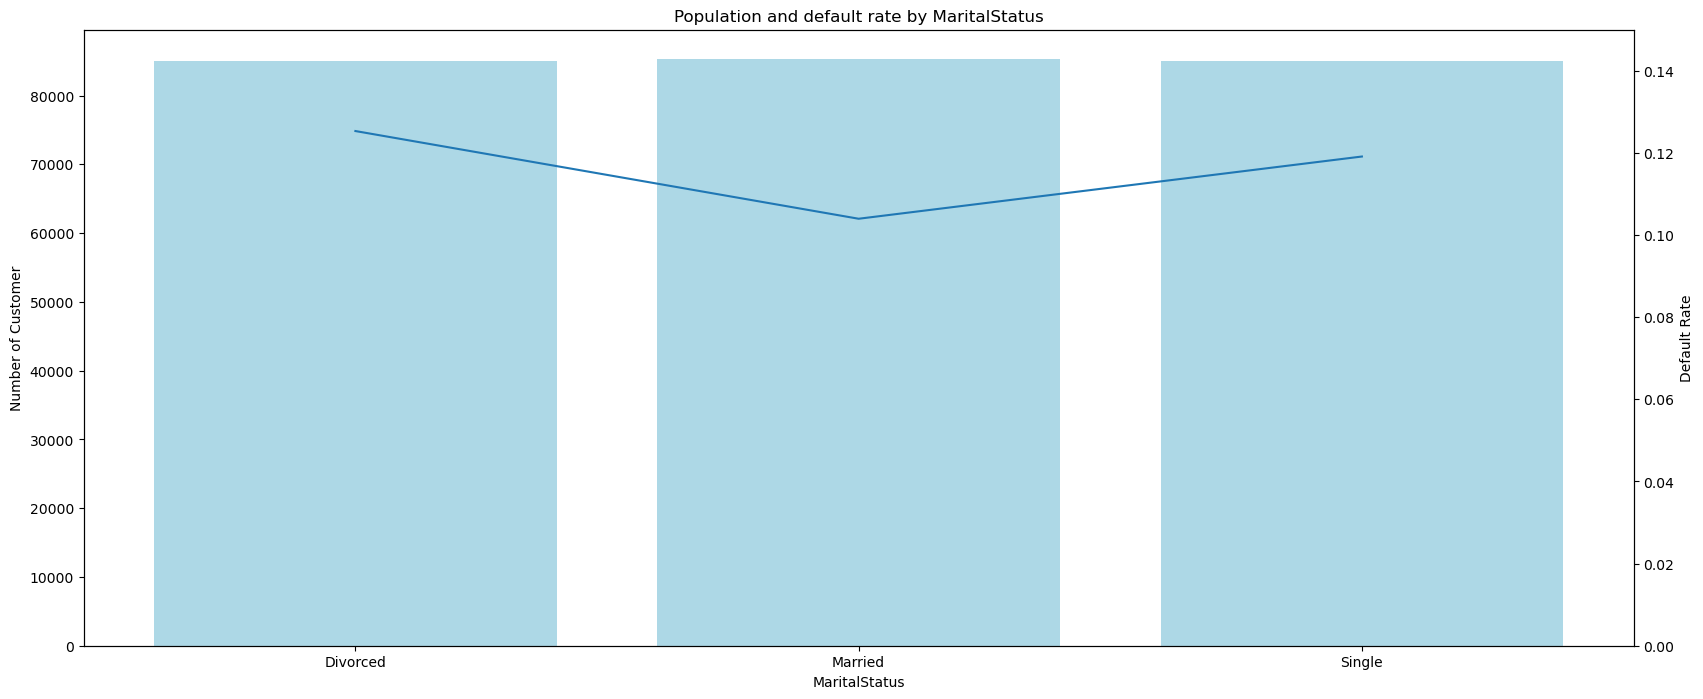

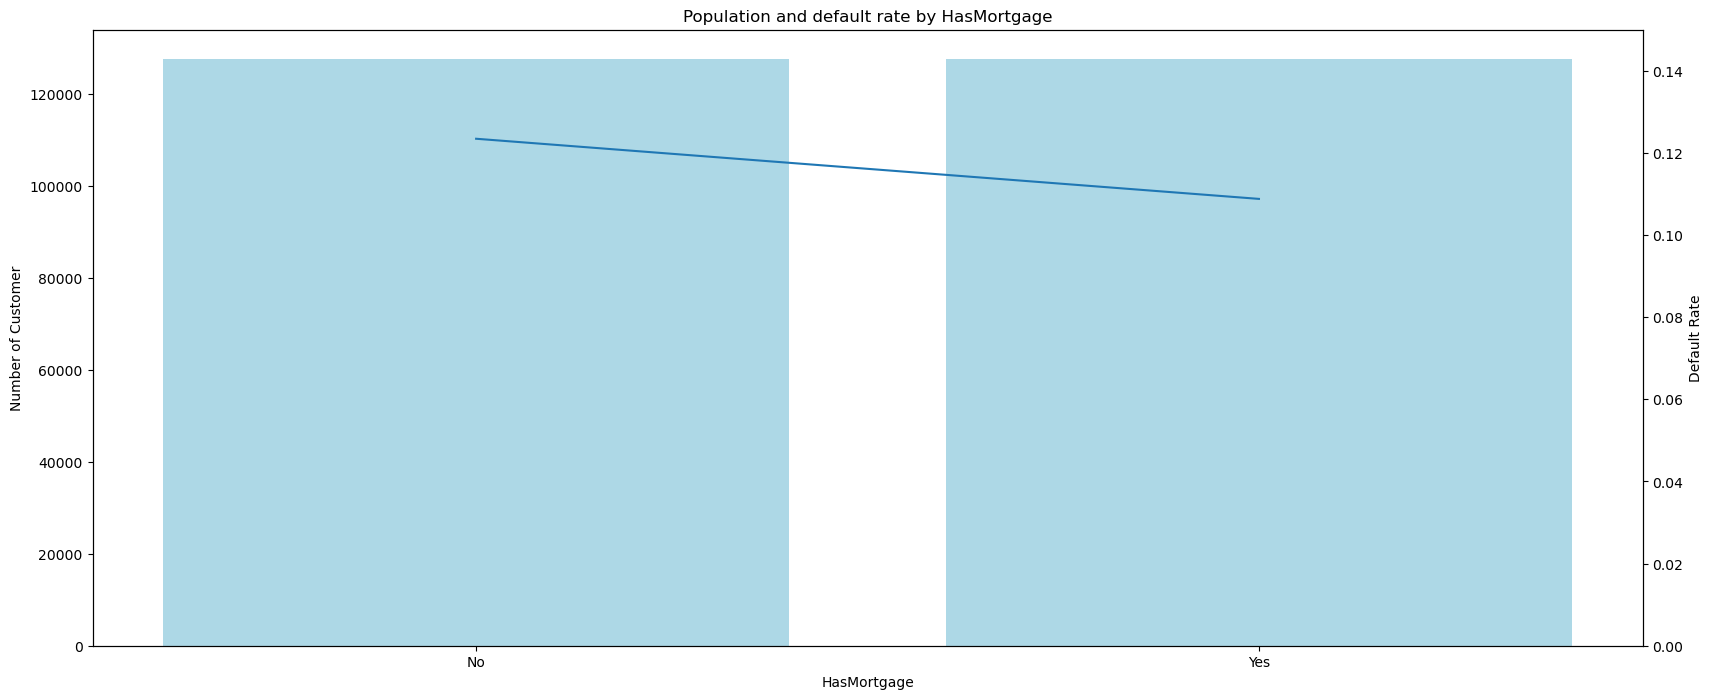

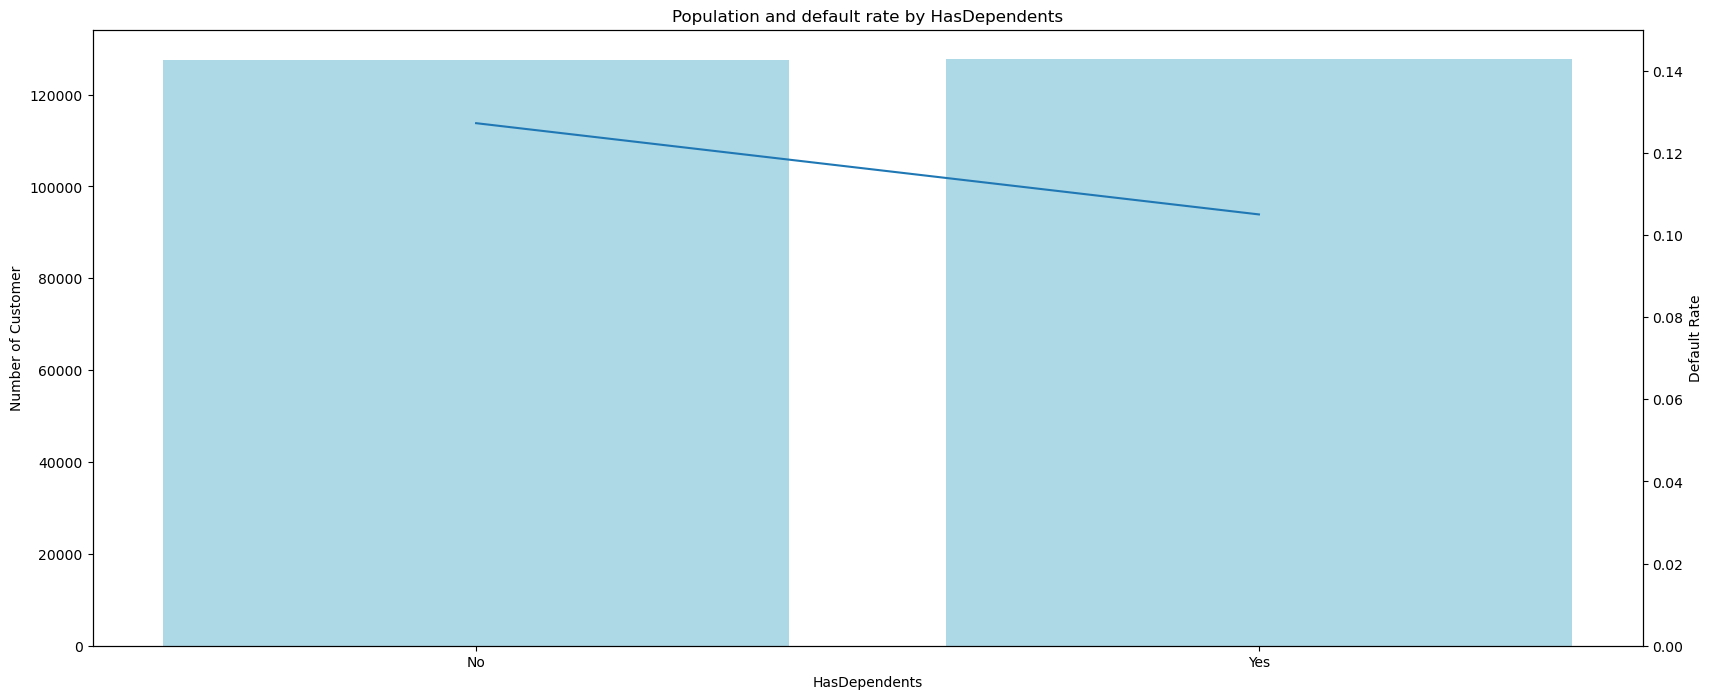

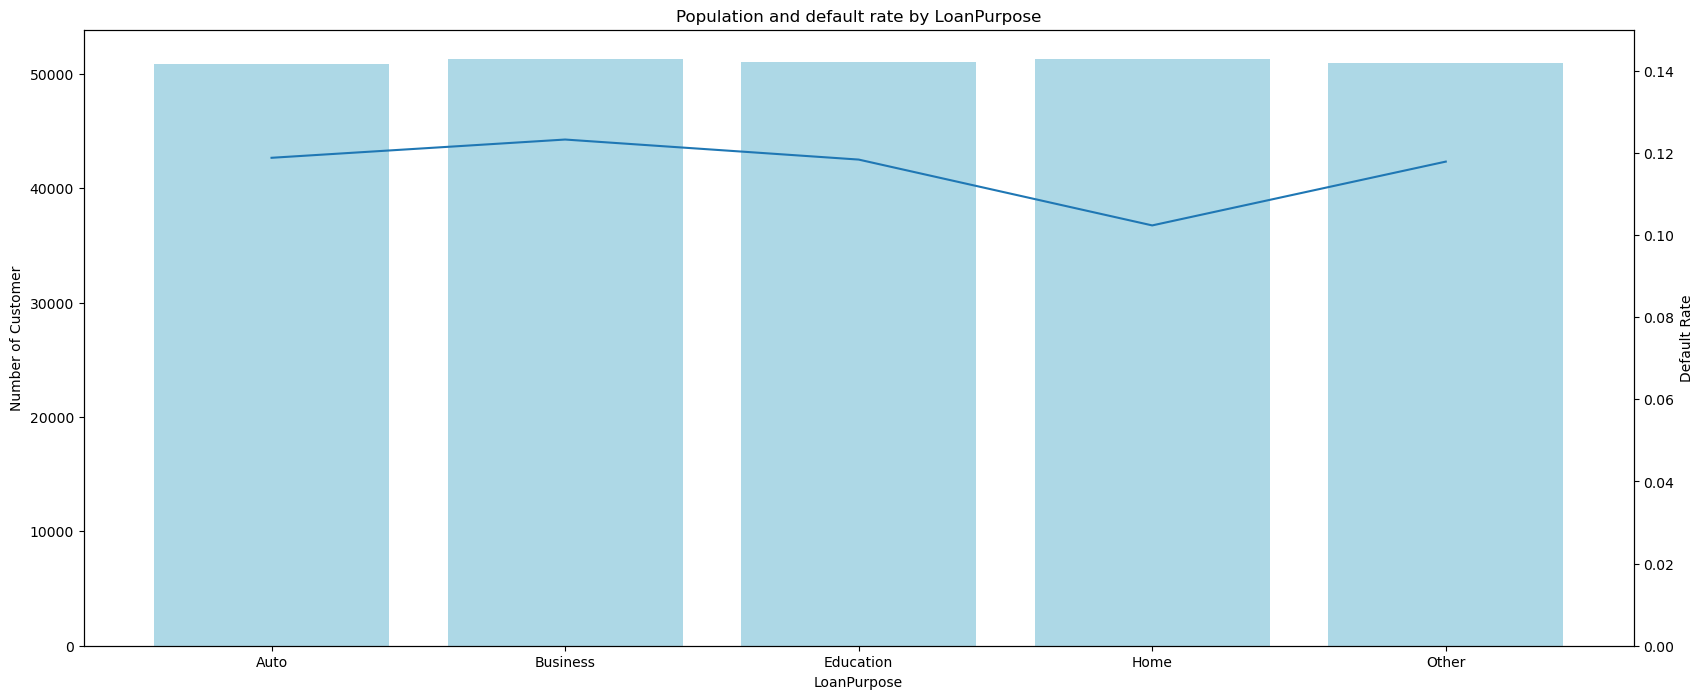

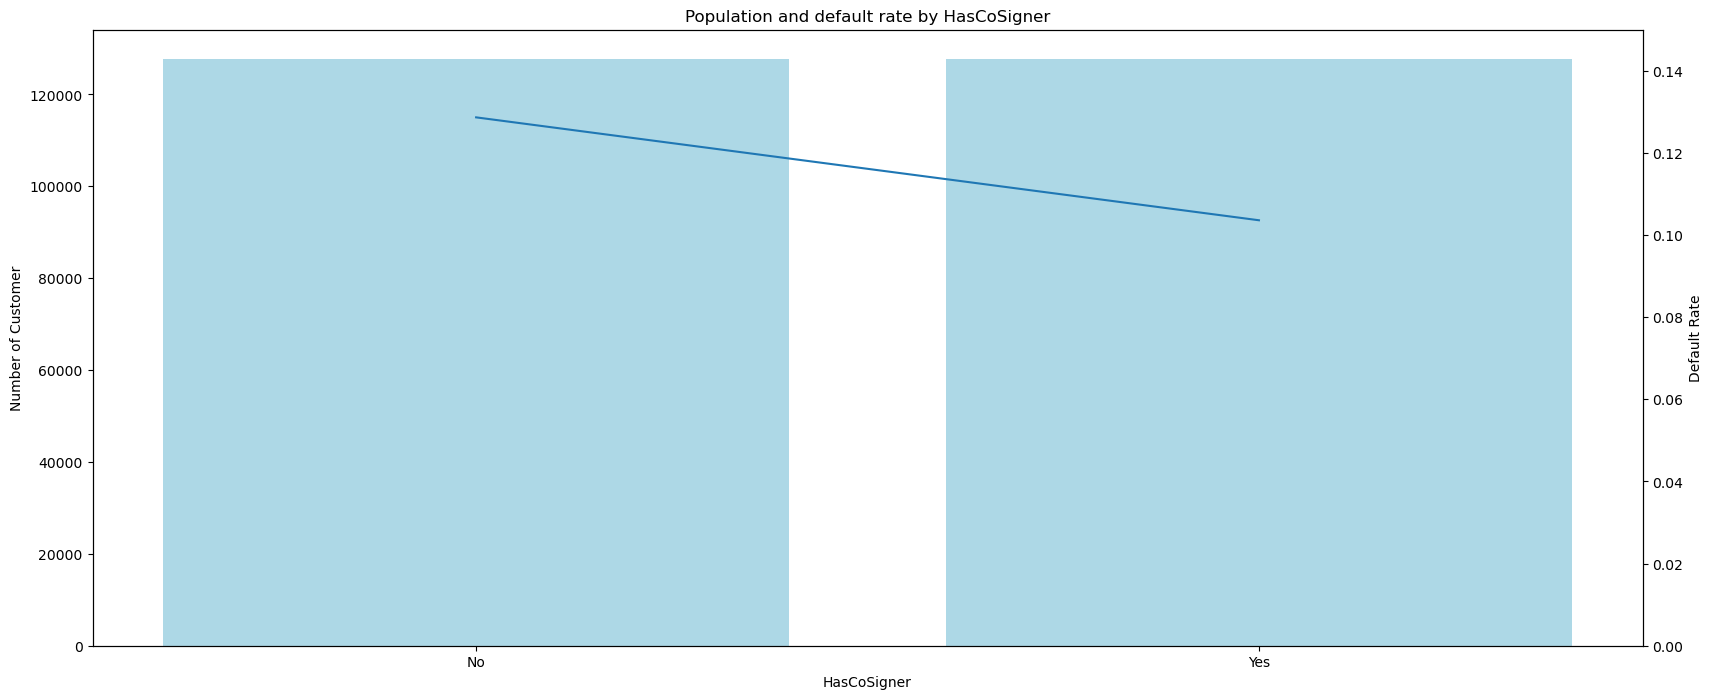

In [11]:
# plot graph to visualize the default by each categorical variable

for x in cat_var: 
    df2 = df.groupby(df[x])['Default'].describe()
    df2.reset_index(inplace=True)
    df2.head()

    fig, ax1 = plt.subplots(figsize = (20, 8))
    ax1.bar(df2[x], df2['count'], color = 'lightblue')
    #ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
    ax2 = ax1.twinx()

    ax2.plot(df2[x], df2['mean'])
    ax2.set_ylim([0, 0.15])
    ax2.set_axisbelow(True)

    ax1.set_title('Population and default rate by ' + x)
    ax1.set_xlabel(x)
    ax1.set_ylabel('Number of Customer')
    ax2.set_ylabel('Default Rate')
    plt.show
    



Observation:

The default rate remains consisitent across all categorical segments, none of them can differentiate the default rate well.



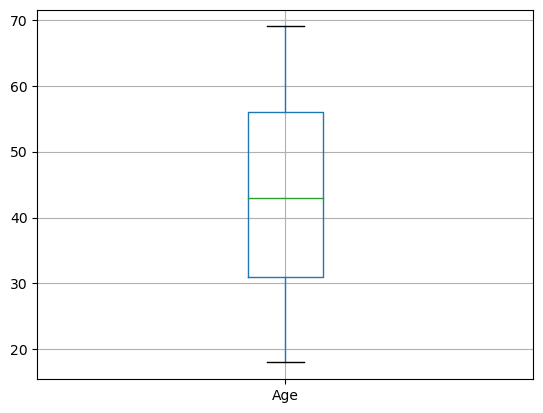

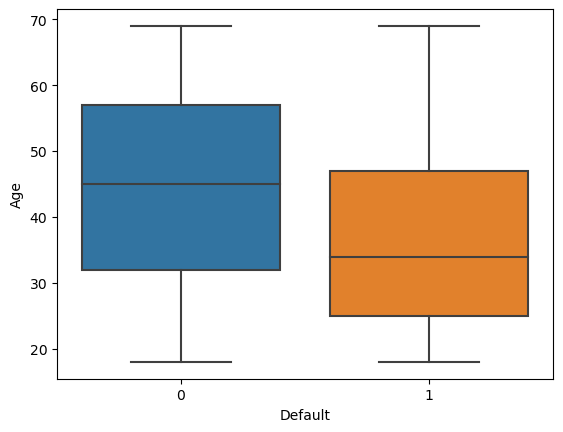

count    255347.000000
mean         43.498306
std          14.990258
min          18.000000
25%          31.000000
50%          43.000000
75%          56.000000
max          69.000000
Name: Age, dtype: float64

In [12]:
#work on numeric variables

#check the distribution of Age
df.boxplot(column=['Age'])
plt.show()
sns.boxplot(x='Default', y='Age', data=df)
plt.show()

df['Age'].describe()

In [13]:
# put Age to categories and check their default rate

Agebins = [18, 25, 35, 45, 55, 69]
AgebinsN = ['1.<=25', '2.26-35', '3.36-45', '4.46-55', '5.>55']

df['AgeRange'] = pd.cut(df['Age'], Agebins, labels=AgebinsN)

df['AgeRange'].value_counts().sort_index()
df.groupby(['AgeRange'])['Default'].describe()




,count,mean,std,min,25%,50%,75%,max
AgeRange,,,,,,,,
1.<=25,34132.0,0.205555,0.404112,0.0,0.0,0.0,0.0,1.0
2.26-35,49408.0,0.160784,0.367335,0.0,0.0,0.0,0.0,1.0
3.36-45,49220.0,0.115482,0.319605,0.0,0.0,0.0,0.0,1.0
4.46-55,49148.0,0.084500,0.278139,0.0,0.0,0.0,0.0,1.0
5.>55,68555.0,0.055022,0.228024,0.0,0.0,0.0,0.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

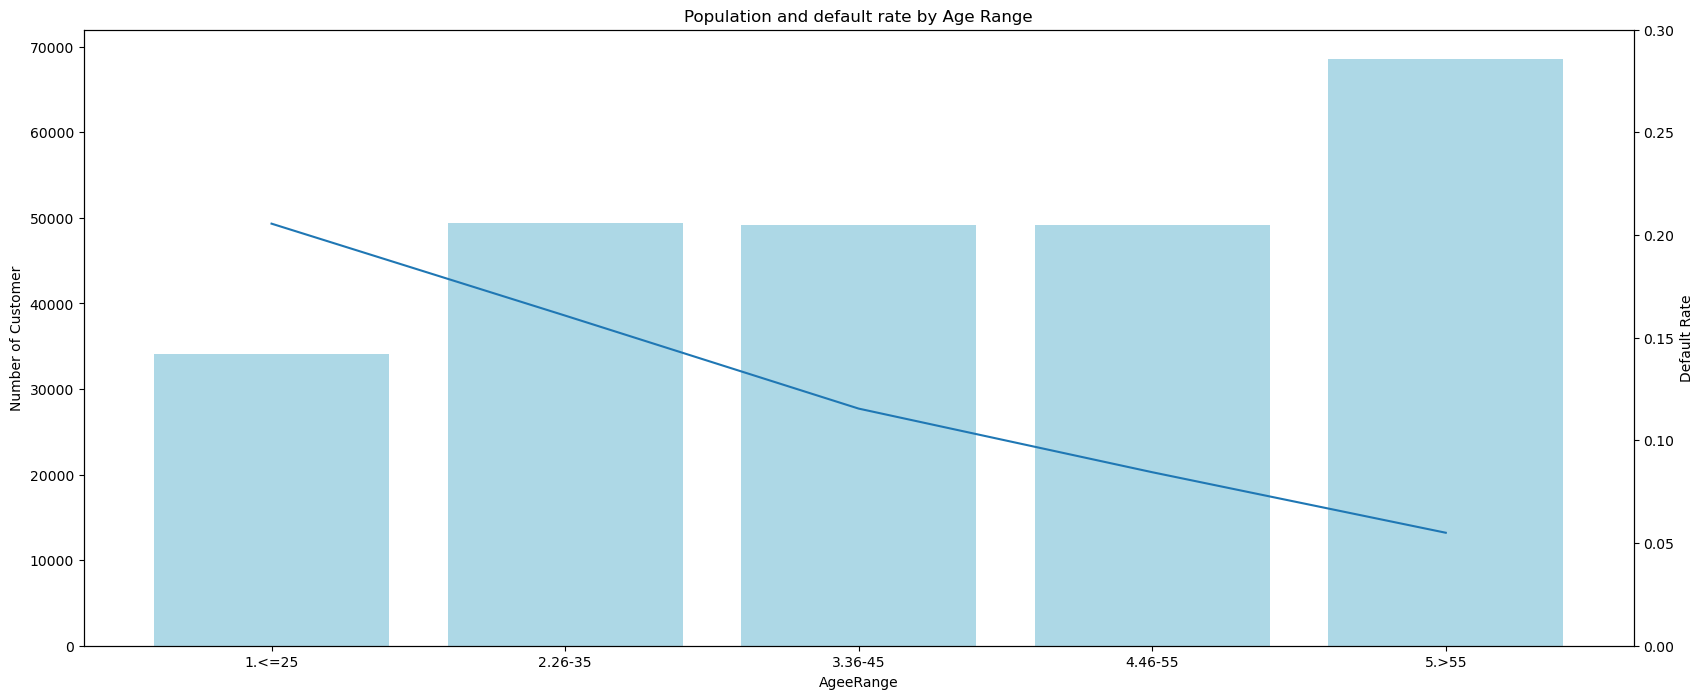

In [14]:
df2 = df.groupby(df['AgeRange'])['Default'].describe()
df2.reset_index(inplace=True)
df2.head()

fig, ax1 = plt.subplots(figsize = (20, 8))
ax1.bar(df2['AgeRange'], df2['count'], color = 'lightblue')
#ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
ax2 = ax1.twinx()

ax2.plot(df2['AgeRange'], df2['mean'])
ax2.set_ylim([0, 0.30])
ax2.set_axisbelow(True)

ax1.set_title('Population and default rate by Age Range')
ax1.set_xlabel('AgeeRange')
ax1.set_ylabel('Number of Customer')
ax2.set_ylabel('Default Rate')
plt.show



Observation:

The default rate drops as the age of customer increases.
The youngest customers have the highest default rate, around 35K customers aged equal to or below 25 have a default rate of 20%.



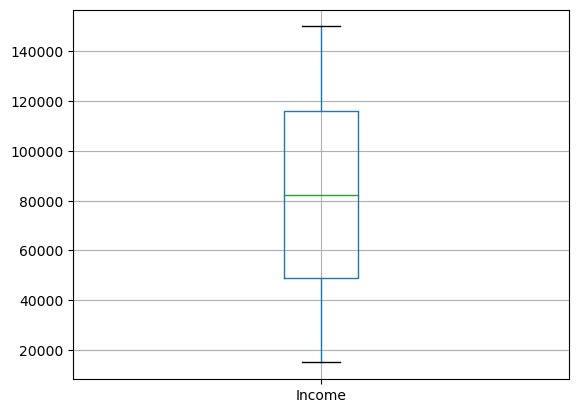

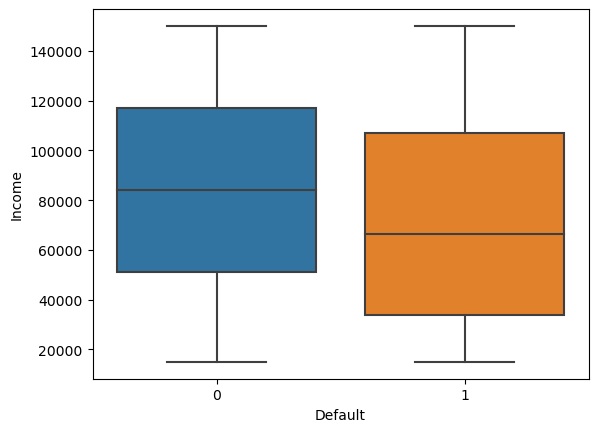

count    255347.000000
mean      82499.304597
std       38963.013729
min       15000.000000
25%       48825.500000
50%       82466.000000
75%      116219.000000
max      149999.000000
Name: Income, dtype: float64

In [16]:
#check the distribution of Income
df.boxplot(column=['Income'])
plt.show()
sns.boxplot(x='Default', y='Income', data=df)
plt.show()

df['Income'].describe()


In [17]:
# put income to categories and check their default rate
incomebins = [0, 25000, 50000, 75000, 100000, 125000, 150000]
incomebinsN = ['1.<=25K', '2.>25K-50K', '3.>50K-75K', '4.>75K-100K', '5.>100K-120K', '6.>120K-150K']

df['IncomeRange'] = pd.cut(df['Income'], incomebins, labels=incomebinsN)

df['IncomeRange'].value_counts().sort_index()
df.groupby(['IncomeRange'])['Default'].describe()


,count,mean,std,min,25%,50%,75%,max
IncomeRange,,,,,,,,
1.<=25K,19048.0,0.240655,0.427493,0.0,0.0,0.0,0.0,1.0
2.>25K-50K,47051.0,0.143674,0.350762,0.0,0.0,0.0,0.0,1.0
3.>50K-75K,47366.0,0.106553,0.308548,0.0,0.0,0.0,0.0,1.0
4.>75K-100K,47317.0,0.098337,0.297773,0.0,0.0,0.0,0.0,1.0
5.>100K-120K,47406.0,0.092625,0.289910,0.0,0.0,0.0,0.0,1.0
6.>120K-150K,47159.0,0.089442,0.285384,0.0,0.0,0.0,0.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

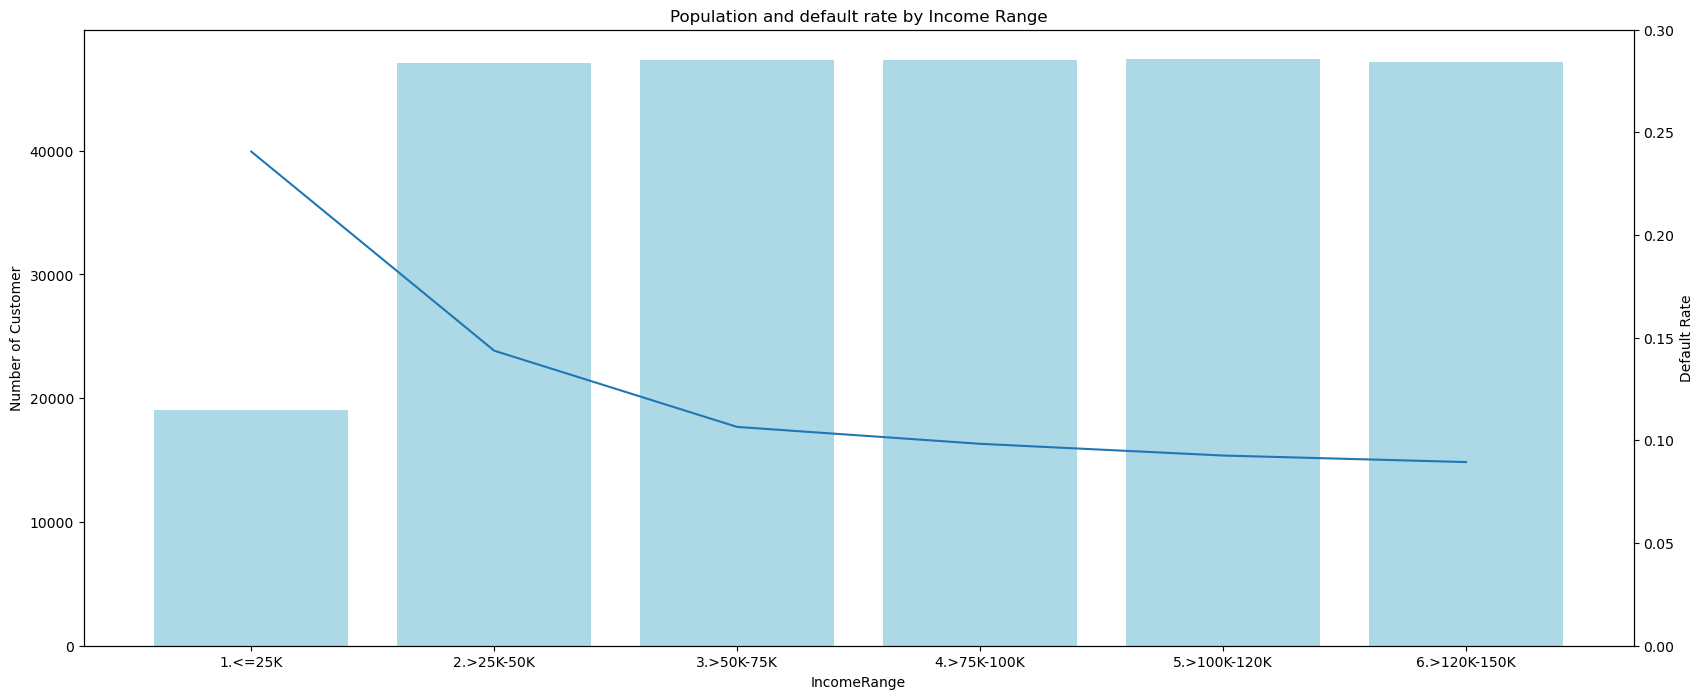

In [18]:
df2 = df.groupby(df['IncomeRange'])['Default'].describe()
df2.reset_index(inplace=True)
df2.head()

fig, ax1 = plt.subplots(figsize = (20, 8))
ax1.bar(df2['IncomeRange'], df2['count'], color = 'lightblue')
#ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
ax2 = ax1.twinx()

ax2.plot(df2['IncomeRange'], df2['mean'])
ax2.set_ylim([0, 0.30])
ax2.set_axisbelow(True)

ax1.set_title('Population and default rate by Income Range')
ax1.set_xlabel('IncomeRange')
ax1.set_ylabel('Number of Customer')
ax2.set_ylabel('Default Rate')
plt.show



Observation:

The lower income level has a higher default rate.
Customers with income level equal to or below 25K have the highest default rate, which is 24%, while the population is around 20K.



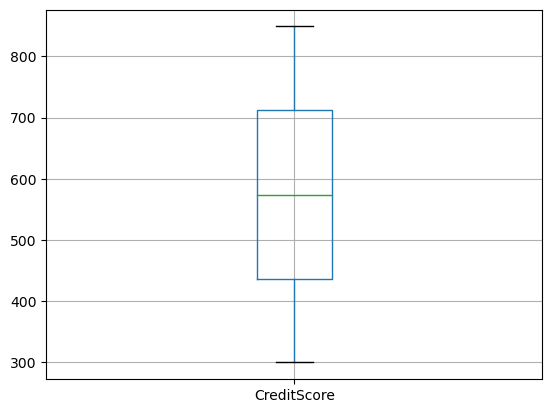

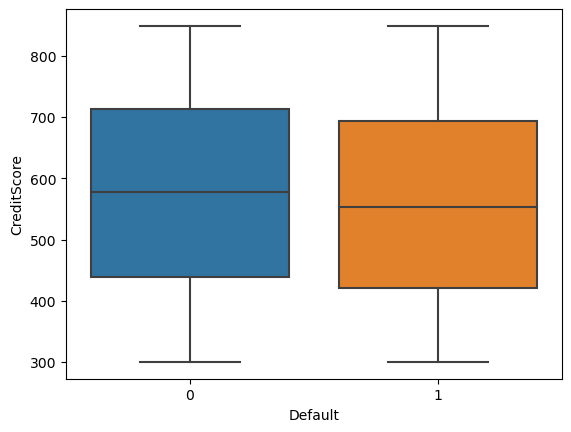

count    255347.000000
mean        574.264346
std         158.903867
min         300.000000
25%         437.000000
50%         574.000000
75%         712.000000
max         849.000000
Name: CreditScore, dtype: float64

In [19]:
# check the distribution of CreditScore
df.boxplot(column=['CreditScore'])
plt.show()
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.show()

df['CreditScore'].describe()

In [20]:
# put creditscore to categories and check their default rate
scorebins = [300, 400, 500, 692, 742, 789, 832, 900]
scorebinsN = ['1.POOR-400', '1.POOR-500', '1.POOR-600', '2.FAIR', '3.GOOD', '4.VERY GOOD', '5.EXCELLENT']

df['ScoreRange'] = pd.cut(df['CreditScore'], scorebins, labels=scorebinsN)

df['ScoreRange'].value_counts().sort_index()

df.groupby(['ScoreRange'])['Default'].mean()


ScoreRange
1.POOR-400     0.132910
1.POOR-500     0.122178
1.POOR-600     0.115056
2.FAIR         0.105559
3.GOOD         0.103820
4.VERY GOOD    0.100302
5.EXCELLENT    0.096056
Name: Default, dtype: float64


Observation:

Even though the default rate drops along with CreditScore, the default rate of the lowest CreditScore range (1.POOR-<400) is just slightly higher than the average default rate of overall observation sample. CreditScore is not a strong indicator to differentiate the risk level.



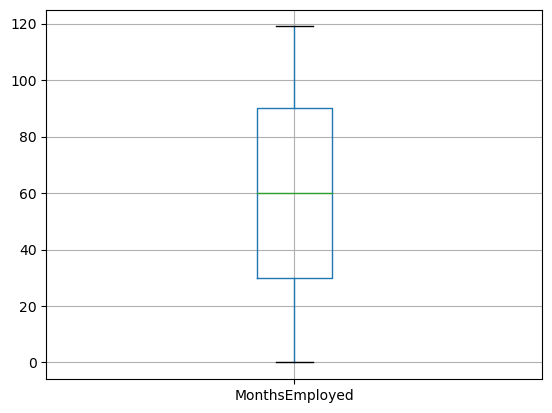

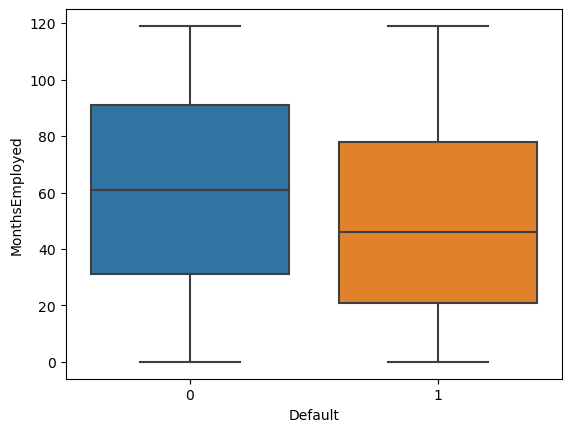

count    255347.000000
mean         59.541976
std          34.643376
min           0.000000
25%          30.000000
50%          60.000000
75%          90.000000
max         119.000000
Name: MonthsEmployed, dtype: float64

In [21]:
# check the distribution of MonthsEmployed
df.boxplot(column=['MonthsEmployed'])
plt.show()
sns.boxplot(x='Default', y='MonthsEmployed', data=df)
plt.show()

df['MonthsEmployed'].describe()


In [22]:
# put Months Employed to categories and check their default rate
MthEmplbins = [0, 12, 24, 36, 48, 60, 72, 120]
MthEmplbinsN = ['1.=<12', '2.13-24', '3.25-36', '4.37-48', '5.49-60', '6.61-72', '7.73-120']

df['MthEmplRange'] = pd.cut(df['MonthsEmployed'], MthEmplbins, labels=MthEmplbinsN)

df['MthEmplRange'].value_counts().sort_index()

df.groupby(['MthEmplRange'])['Default'].mean()

MthEmplRange
1.=<12      0.168050
2.13-24     0.155034
3.25-36     0.142941
4.37-48     0.127483
5.49-60     0.114588
6.61-72     0.106557
7.73-120    0.084745
Name: Default, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

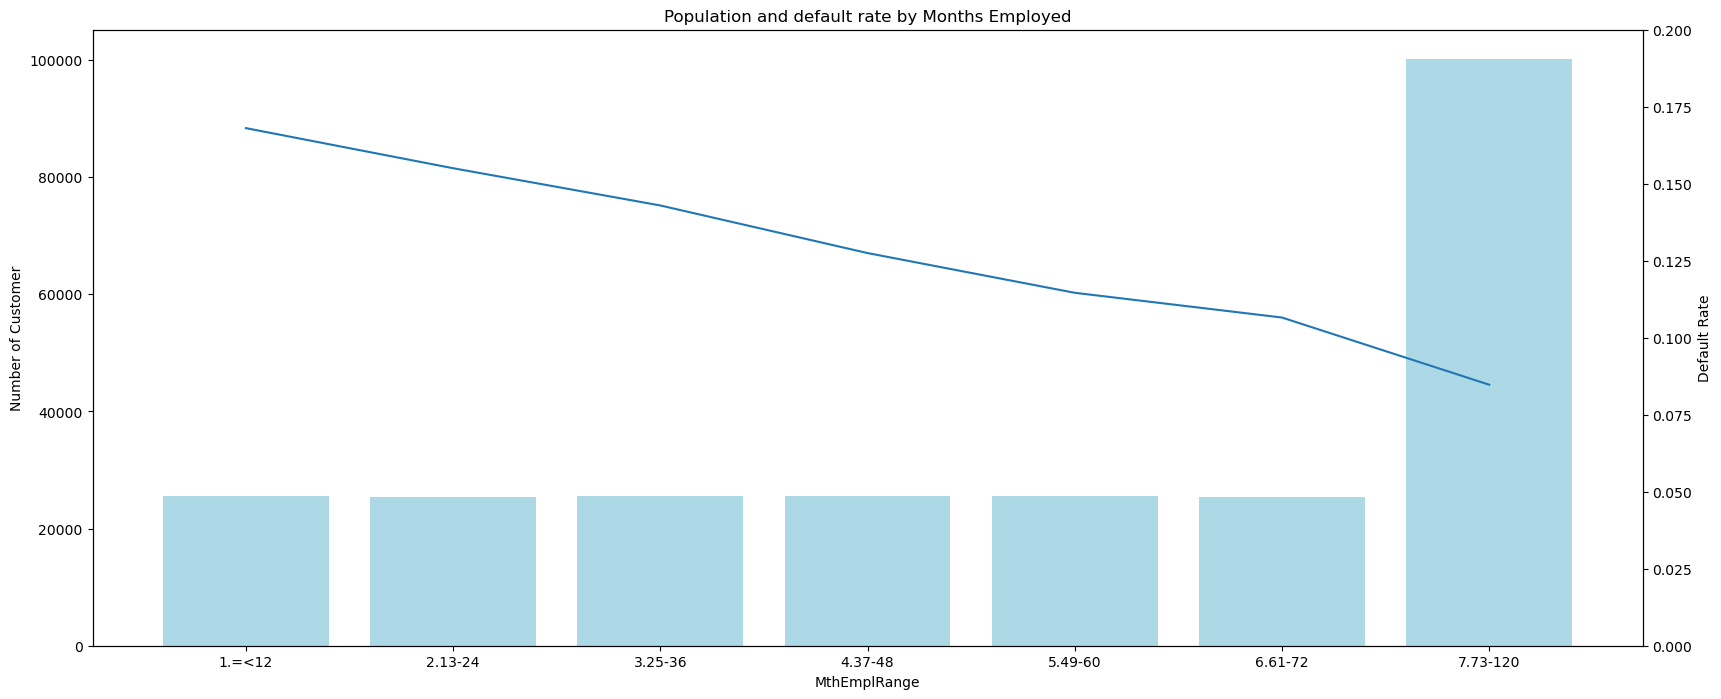

In [23]:
#visualize the default rate by month employed

df2 = df.groupby(df['MthEmplRange'])['Default'].describe()
df2.reset_index(inplace=True)
df2.head()

fig, ax1 = plt.subplots(figsize = (20, 8))
ax1.bar(df2['MthEmplRange'], df2['count'], color = 'lightblue')
#ax1.set_yticklabels(['{:,}'.format(int(x)) for x in ax1.get_yticks().tolist()])
ax2 = ax1.twinx()

ax2.plot(df2['MthEmplRange'], df2['mean'])
ax2.set_ylim([0, 0.20])
ax2.set_axisbelow(True)

ax1.set_title('Population and default rate by Months Employed')
ax1.set_xlabel('MthEmplRange')
ax1.set_ylabel('Number of Customer')
ax2.set_ylabel('Default Rate')
plt.show



Observation:

The default rate drops along with Month Employed.
The default rate of Month Employed less than or equal to 12 months reached 16.8%, which accounted for more than 20K customers.



In [24]:
#check the default rate by number of credit line

df.groupby(['NumCreditLines'])['Default'].describe()

,count,mean,std,min,25%,50%,75%,max
NumCreditLines,,,,,,,,
1,63554.0,0.105233,0.306856,0.0,0.0,0.0,0.0,1.0
2,64130.0,0.110588,0.313624,0.0,0.0,0.0,0.0,1.0
3,63834.0,0.119247,0.324081,0.0,0.0,0.0,0.0,1.0
4,63829.0,0.129424,0.335671,0.0,0.0,0.0,0.0,1.0



Observation:

The default rate remains consistent for the customers with different number of credit line. Number of credit line cannot differentiate the risk level well.



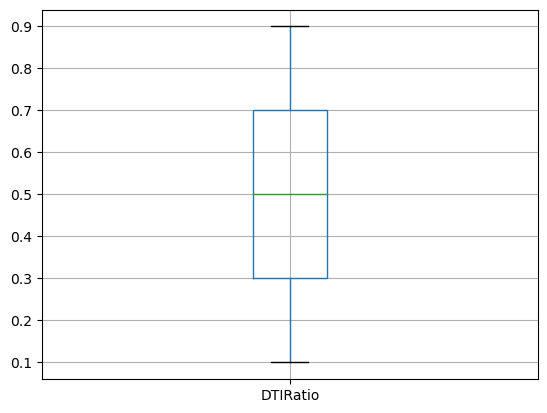

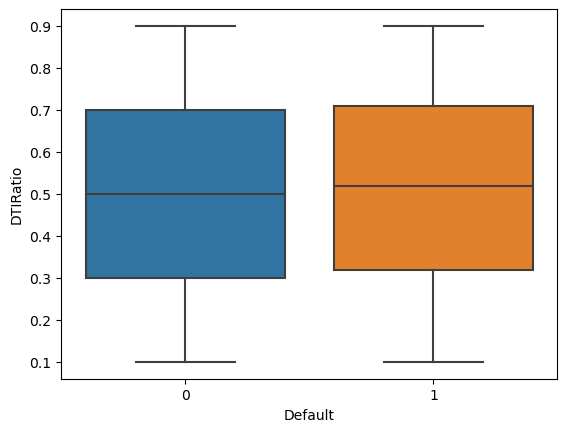

count    255347.000000
mean          0.500212
std           0.230917
min           0.100000
25%           0.300000
50%           0.500000
75%           0.700000
max           0.900000
Name: DTIRatio, dtype: float64

In [26]:
# check the distribution of DTIRatio
df.boxplot(column=['DTIRatio'])
plt.show()
sns.boxplot(x='Default', y='DTIRatio', data=df)
plt.show()

df['DTIRatio'].describe()


In [27]:
# put DTIRatio to categories and check their default rate

DTIRatiobins = [0, 0.25, 0.5, 0.75, 0.9]
DTIRatiobinsN = ['1.<=25%', '2.>25%-50%', '3.>50%-75%', '4.>75%-90%']

df['DTIRatioRange'] = pd.cut(df['DTIRatio'], DTIRatiobins, labels=DTIRatiobinsN)

df['DTIRatioRange'].value_counts().sort_index()

df.groupby(['DTIRatioRange'])['Default'].mean()

DTIRatioRange
1.<=25%       0.105804
2.>25%-50%    0.114093
3.>50%-75%    0.120547
4.>75%-90%    0.123018
Name: Default, dtype: float64


Observation:

The default rate remains consistent for the customers with DTI ratio. DTI ratio cannot differentiate the risk level well.





STEP 3. conduct risk and reward analysis 

After understanding the default rate of each variable. Let's conduct the risk and reward analysis.



In [28]:
#understand the max interest rate earned in the portfolio

df['InterestRate'].describe()


count    255347.000000
mean         13.492773
std           6.636443
min           2.000000
25%           7.770000
50%          13.460000
75%          19.250000
max          25.000000
Name: InterestRate, dtype: float64


Maximum reward and high-risk segment to be identified: 

The maximum interest rate of the portfolio is 25%. Assuming no other fees are inccured, the APR would be 25%. The default rate higher than or equal to 25% will lead to negative profit, with no costs considered. These segments will be considered high-risk segments. 



In [29]:
#deep dive analysis to the variables Age / Income / Month employed that can differentiate the risk level

#Income with Age:

df[df['Income']<50000].groupby([df['IncomeRange'], df['AgeRange']])['Default'].describe()


count      mean       std  min  25%  50%  75%  max
IncomeRange AgeRange                                                      
1.<=25K     1.<=25     2543.0  0.394416  0.488821  0.0  0.0  0.0  1.0  1.0
            2.26-35    3626.0  0.314672  0.464449  0.0  0.0  0.0  1.0  1.0
            3.36-45    3669.0  0.246116  0.430806  0.0  0.0  0.0  0.0  1.0
            4.46-55    3807.0  0.195692  0.396785  0.0  0.0  0.0  0.0  1.0
            5.>55      5005.0  0.128671  0.334869  0.0  0.0  0.0  0.0  1.0
2.>25K-50K  1.<=25     6336.0  0.239741  0.426959  0.0  0.0  0.0  0.0  1.0
            2.26-35    9186.0  0.202155  0.401629  0.0  0.0  0.0  0.0  1.0
            3.36-45    9164.0  0.146879  0.354005  0.0  0.0  0.0  0.0  1.0
            4.46-55    8965.0  0.106302  0.308241  0.0  0.0  0.0  0.0  1.0
            5.>55     12581.0  0.069867  0.254933  0.0  0.0  0.0  0.0  1.0


High-risk segment 1:

customers aged 35 or younger with income level <= 25K has default rate higher than 30%.



In [30]:
# filter the group (income <= 25000 and age <= 35)

df_filtered = df[(df['Age']>=36) & (df['Income']<=25000) | (df['Income']>25000)]

# after excluding the high loss rate group, further explorate the income with month employed:
df_filtered[df_filtered['Income']<50000].groupby([df_filtered['IncomeRange'], df_filtered['MthEmplRange']])['Default'].describe()

count      mean       std  min  25%  50%  75%  max
IncomeRange MthEmplRange                                                      
1.<=25K     1.=<12         1251.0  0.265388  0.441716  0.0  0.0  0.0  1.0  1.0
            2.13-24        1248.0  0.237981  0.426018  0.0  0.0  0.0  0.0  1.0
            3.25-36        1217.0  0.218570  0.413446  0.0  0.0  0.0  0.0  1.0
            4.37-48        1309.0  0.193277  0.395019  0.0  0.0  0.0  0.0  1.0
            5.49-60        1299.0  0.187837  0.390732  0.0  0.0  0.0  0.0  1.0
            6.61-72        1245.0  0.175100  0.380206  0.0  0.0  0.0  0.0  1.0
            7.73-120       4805.0  0.136941  0.343821  0.0  0.0  0.0  0.0  1.0
2.>25K-50K  1.=<12         4646.0  0.202325  0.401776  0.0  0.0  0.0  0.0  1.0
            2.13-24        4809.0  0.191516  0.393535  0.0  0.0  0.0  0.0  1.0
            3.25-36        4769.0  0.172363  0.377735  0.0  0.0  0.0  0.0  1.0
            4.37-48        4637.0  0.152685  0.359722  0.0  0.0  0.0  0.0  1.0
            5.49-60        4658.0  0.136325  0.343170  0.0  0.0  0.0  0.0  1.0
            6.61-72        4653.0  0.131958  0.338481  0.0  0.0  0.0  0.0  1.0
            7.73-120      18481.0  0.109518  0.312296  0.0  0.0  0.0  0.0  1.0


High-risk segment 2:

customers with income level <= 25K and employment month <= 12 have default rate 26.5%.



In [31]:
# filter the group (income <= 25000 and MthEmplRange <= 12) with high default rate

df_filtered2 = df_filtered[(df_filtered['MonthsEmployed']>=12) & (df_filtered['Income']<=25000) | (df_filtered['Income']>25000)]

# after excluding the high default rate group, further explorate the age with month employed:

df_filtered2[df_filtered2['Age']<35].groupby([df_filtered2['AgeRange'], df_filtered2['MthEmplRange']])['Default'].describe()


count      mean       std  min  25%  50%  75%  max
AgeRange MthEmplRange                                                      
1.<=25   1.=<12         3108.0  0.272523  0.445329  0.0  0.0  0.0  1.0  1.0
         2.13-24        3104.0  0.250644  0.433454  0.0  0.0  0.0  1.0  1.0
         3.25-36        3125.0  0.229440  0.420540  0.0  0.0  0.0  0.0  1.0
         4.37-48        3177.0  0.218130  0.413041  0.0  0.0  0.0  0.0  1.0
         5.49-60        3106.0  0.197360  0.398070  0.0  0.0  0.0  0.0  1.0
         6.61-72        3222.0  0.175357  0.380331  0.0  0.0  0.0  0.0  1.0
         7.73-120      12475.0  0.137315  0.344193  0.0  0.0  0.0  0.0  1.0
2.26-35  1.=<12         4038.0  0.221644  0.415404  0.0  0.0  0.0  0.0  1.0
         2.13-24        4048.0  0.187747  0.390558  0.0  0.0  0.0  0.0  1.0
         3.25-36        4217.0  0.193028  0.394722  0.0  0.0  0.0  0.0  1.0
         4.37-48        4216.0  0.168880  0.374691  0.0  0.0  0.0  0.0  1.0
         5.49-60        4140.0  0.144686  0.351826  0.0  0.0  0.0  0.0  1.0
         6.61-72        4124.0  0.138215  0.345168  0.0  0.0  0.0  0.0  1.0
         7.73-120      16104.0  0.111711  0.315021  0.0  0.0  0.0  0.0  1.0


High-risk segment 3:

customers aged below 25 with employment month <= 24 have default rate higher than 25%.





STEP 4: provid insights from the analysis result
    
    


Analysis Result: 

According to the analysis results, a customer's age, income level and months employed can significantly differentiate the risk level of customers. Three segments with default rate higher than the maximum interest rate of 25% have been identified that may lead to negative profit. These three segments are as follows:  

1.customers aged 35 or younger with an income level 25000 or less 
2.customers with an income level of 25000 or less and employed for 12 months or less 
3.custmers aged 25 or younger and employed for 24 months or less





STEP 5: make recommendation with impact analysis



In [32]:
# define a New variable with high default rate 

def HighRiskCondition (row):
    if row['Income'] <= 25000 and row['Age'] <= 35:
        return 1
    elif row['Income'] <= 25000 and row['MonthsEmployed'] <= 12:
        return 2
    elif row['Age'] <= 25 and row['MonthsEmployed'] <= 24:
        return 3
    else:
        return 0
    
df['HighRiskSegment'] = df.apply(HighRiskCondition, axis = 1)

df.groupby(df['HighRiskSegment'])['Default'].describe()


,count,mean,std,min,25%,50%,75%,max
HighRiskSegment,,,,,,,,
0,239959.0,0.104214,0.305538,0.0,0.0,0.0,0.0,1.0
1,6567.0,0.349018,0.476696,0.0,0.0,0.0,1.0,1.0
2,1358.0,0.262150,0.439966,0.0,0.0,0.0,1.0,1.0
3,7463.0,0.267721,0.442801,0.0,0.0,0.0,1.0,1.0


In [33]:
# impact analysis

df2 = df.groupby(df['HighRiskSegment'])['Default'].describe()
df2.reset_index(inplace=True)

NewDR = df2.loc[df2['HighRiskSegment']==0, 'mean'] * 100
impact =(1- (df2.loc[df2['HighRiskSegment']==0, 'count'] / df2['count'].sum())) * 100

print ('New Default Rate is ' +  str(NewDR.values[0]) + '%')
print ('Population impact is ' +  str(impact.values[0]) + '%')

New Default Rate is 10.421363649623478%
Population impact is 6.0263092967608785%



Recommendation:

Since three segments have been identified with default rate higher than interest rate 25%, resulting in negative profit, it is proposed to reject those three segments from the new acquisition. After excluding those 3 segments, the default rate of the portfolio would drop from 11.6% to 10.4%, and the population will drop by 6%.

